In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Data

In [ ]:
# Helper function
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)


    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
#tampilin semua kolom dalam display pandas
pd.set_option( 'display.max_rows', None)
pd.set_option('display.max_columns', None )

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary['missing'] = df.isnull().sum().values
    summary['missing(%)'] = 100 * df.isnull().sum().values / len(df)
    summary['unique'] = df.nunique().values
    summary['first_value'] = df.iloc[0].values
    summary['second_value'] = df.iloc[1].values
    summary['third_value'] = df.iloc[2].values
    return summary

**Columns and Their Descriptions**

*   trans_date_trans_time: Timestamp of the transaction.
*   cc_num: Credit card number (encrypted).
*merchant: The store or vendor where the transaction occurred.
*category: Transaction category (e.g., groceries, entertainment).
*amt: Transaction amount.
*first: Cardholder's first name.
*last: Cardholder's last name.
*gender: Cardholder's gender.
*street: Street where the cardholder resides.
*city: City where the cardholder resides.
*state: State where the cardholder resides.
*zip: Postal code of the cardholder.
*lat: Latitude of the cardholder's address.
*long: Longitude of the cardholder's address.
*city_pop: Population of the city where the transaction occurred.
*job: Cardholder's occupation.
*dob: Cardholder's date of birth.
*trans_num: Unique transaction number.
*unix_time: Unix timestamp of the transaction.
*merch_lat: Latitude of the merchant's location.
*merch_long: Longitude of the merchant's location.
*is_fraud: Indicates whether the transaction is fraudulent. This is the target feature I will predict.
*merch_zipcode: Merchant's postal code.



In [ ]:
# prompt: please check file in this drive My Drive\Fraud detection

!ls "/content/drive/MyDrive/Fraud detection"

 credit_card_transaction_test.csv
 credit_card_transaction_train.csv
'Fraud detection.ipynb'
'Guideline - Bank Indonesia Hackathon 2025.pdf'
'Panduan Proposal - Bank Indonesia Hackathon 2025.pdf'


In [ ]:
# prompt: please import data credit_card_transaction_train.csv from "/content/drive/MyDrive/Fraud detection", dont use path.join

import pandas as pd
df_train = pd.read_csv("/content/drive/MyDrive/Fraud detection/credit_card_transaction_train.csv")
df_train = reduce_mem_usage(df_train)
resumetable(df_train)
df_train.head()


Memory usage of dataframe is 237.43 MB
Memory usage after optimization is: 166.94 MB
Decreased by 29.7%
Dataset Shape: (1296675, 24)


/tmp/ipython-input-6-1492374155.py:25: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.96875,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.09375,-81.1875,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.00000,-82.0625,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.25000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.87500,-118.1875,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15625,-118.1875,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.12500,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18750,-112.2500,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15625,-112.1250,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.21875,-112.1250,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03125,-112.5625,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96875,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.40625,-79.4375,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.68750,-78.6250,0,22844.0


## Data Training

In [ ]:
df_fraud = df_train[df_train['is_fraud'] == 1]
df_fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.000000,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,36.0000,-81.7500,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.437500,-81.1875,1,28644.0
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.523438,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4375,-98.4375,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.812500,-99.1250,1,78055.0
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.250000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4375,-98.4375,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.265625,-98.8125,1,78039.0
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.031250,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,36.0000,-81.7500,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.906250,-82.0625,1,28777.0
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.750000,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4375,-98.4375,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.781250,-98.6875,1,78006.0


## Data Testing

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Fraud detection/credit_card_transaction_test.csv")
df_test = reduce_mem_usage(df_test)
df_test.head(4)

Memory usage of dataframe is 101.76 MB
Memory usage after optimization is: 71.55 MB
Decreased by 29.7%


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.859375,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.96875,-80.9375,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,34.0000,-81.1875,0,29072.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.843750,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.31250,-110.4375,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.4375,-109.9375,0,NaN
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.281250,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.68750,-73.5625,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.5000,-74.1875,0,10307.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.062500,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.56250,-80.8125,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.8125,-80.8750,0,32759.0


In [ ]:
resumetable(df_test)

Dataset Shape: (555719, 32)


,dtypes,missing,missing(%),unique,first_value,second_value,third_value
Unnamed: 0,int32,0,0.000000,555719,157,741,3047
trans_date_trans_time,datetime64[ns],0,0.000000,544760,2020-06-21 13:05:42,2020-06-21 16:25:36,2020-06-22 07:58:33
cc_num,int64,0,0.000000,924,60416207185,60416207185,60416207185
merchant,object,0,0.000000,693,fraud_Kutch-Ferry,fraud_Halvorson Group,fraud_Conroy-Cruickshank
category,object,0,0.000000,14,home,misc_pos,gas_transport
amt,float16,0,0.000000,8478,124.6875,78.5,65.25
first,object,0,0.000000,341,Mary,Mary,Mary
last,object,0,0.000000,471,Diaz,Diaz,Diaz
gender,object,0,0.000000,2,F,F,F
street,object,0,0.000000,924,9886 Anita Drive,9886 Anita Drive,9886 Anita Drive


# EDA

In [ ]:
# Menghitung jumlah transaksi dan proporsi is_fraud per card number
card_summary = df_train.groupby('cc_num')['is_fraud'].agg(['count', 'mean']).reset_index()
card_summary.rename(columns={'count': 'jumlah_transaksi', 'mean': 'proporsi_is_fraud'}, inplace=True)

top_fraud_cards = card_summary.sort_values(by='proporsi_is_fraud', ascending=False).head(20)

print(top_fraud_cards)
df_train['is_fraud'].agg(['mean','count'])

                  cc_num  jumlah_transaksi  proporsi_is_fraud
976  4911818930706644725                 9                1.0
957  4714017207228610634                 7                1.0
952  4659625317833446364                12                1.0
20          503886119844                 9                1.0
937  4481172224716138389                 8                1.0
931  4457136361520330110                 8                1.0
915  4257110907449569602                10                1.0
912  4243521033756702612                 9                1.0
903  4180192513916047166                11                1.0
902  4162872756672112717                10                1.0
882     6577777028615915                 7                1.0
862     6517779374888867                11                1.0
854     6500249000784905                 9                1.0
850     6011935564104173                11                1.0
845     6011826317034777                 9                1.0
844     

,is_fraud
mean,5.788652e-03
count,1.296675e+06


In [ ]:
# prompt: create new variable that compute the time gap (in hour) between the transaction (trans_date_trans_time) of the same card (CC_num)

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train = df_train.sort_values(by=['cc_num', 'trans_date_trans_time'])

df_train['transaction_time'] = df_train.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 3600
df_train['transaction_std'] = df_train.groupby('cc_num')['amt'].transform('std')
df_train['transaction_avg'] = df_train.groupby('cc_num')['amt'].transform('mean')

In [ ]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test = df_test.sort_values(by=['cc_num', 'trans_date_trans_time'])

df_test['transaction_time'] = df_test.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 3600
df_test['transaction_std'] = df_test.groupby('cc_num')['amt'].transform('std')
df_test['transaction_avg'] = df_test.groupby('cc_num')['amt'].transform('mean')

In [ ]:
# prompt: calculate the age based on dob variable to 2025

df_train['dob'] = pd.to_datetime(df_train['dob'])
df_train['age'] = 2025 - df_train['dob'].dt.year

df_test['dob'] = pd.to_datetime(df_train['dob'])
df_test['age'] = 2025 - df_test['dob'].dt.year

In [ ]:
# prompt: create variable day, month, and hour

df_train['day'] = df_train['trans_date_trans_time'].dt.day
df_train['month'] = df_train['trans_date_trans_time'].dt.month
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,transaction_time,transaction_std,transaction_avg,age,day,month,hour
1017,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.269531,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.96875,-109.7500,0,NaN,NaN,122.65367,56.024014,39,1,1,12
2724,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.937500,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.03125,-109.0625,0,NaN,19.961667,122.65367,56.024014,39,2,1,8
2726,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.062500,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.96875,-109.1875,0,NaN,0.044167,122.65367,56.024014,39,2,1,8
2882,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.781250,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.21875,-108.7500,0,NaN,3.843889,122.65367,56.024014,39,2,1,12
2907,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.187500,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.31250,-108.0625,0,82649.0,0.542222,122.65367,56.024014,39,2,1,13


In [ ]:

df_test['day'] = df_test['trans_date_trans_time'].dt.day
df_test['month'] = df_test['trans_date_trans_time'].dt.month
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,transaction_time,transaction_std,transaction_avg,age,day,month,hour
157,157,2020-06-21 13:05:42,60416207185,fraud_Kutch-Ferry,home,124.6875,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1972-07-01,f21e1a09f59c50a66735409308285b1d,1371819942,42.93750,-108.5000,0,82510.0,NaN,180.02718,66.499519,53,21,6,13
741,741,2020-06-21 16:25:36,60416207185,fraud_Halvorson Group,misc_pos,78.5000,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1994-03-13,08f67c9765438973006f8250351d8c1f,1371831936,42.18750,-108.6875,0,NaN,3.331667,180.02718,66.499519,31,21,6,16
3047,3047,2020-06-22 07:58:33,60416207185,fraud_Conroy-Cruickshank,gas_transport,65.2500,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1966-05-29,ca1f04d9d549c507356ffa8f9b43d81f,1371887913,43.93750,-109.6875,0,NaN,15.549167,180.02718,66.499519,59,22,6,7
4351,4351,2020-06-22 15:32:31,60416207185,fraud_Larkin Ltd,kids_pets,87.7500,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1945-09-20,d671d98fded8ca75d799959a444577a5,1371915151,43.53125,-109.1875,0,NaN,7.566111,180.02718,66.499519,80,22,6,15
7695,7695,2020-06-23 12:28:54,60416207185,fraud_Leffler-Goldner,personal_care,148.0000,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0,-108.875,1645,Information systems manager,1961-04-25,86d346444b5b262159976aa4d8b64fbb,1371990534,42.87500,-109.3125,0,NaN,20.939722,180.02718,66.499519,64,23,6,12


In [ ]:
# prompt: creat a new variable that compute euclidean distance from lat and long to merch_lat and merch_long

#import numpy as np
#df_train['dist_to_merch'] = np.sqrt((df_train['lat'] - df_train['merch_lat'])**2 + (df_train['long'] - df_train['merch_long'])**2)
#df_test['dist_to_merch'] = np.sqrt((df_test['lat'] - df_test['merch_lat'])**2 + (df_test['long'] - df_test['merch_long'])**2)

# Pre-Processing Data

## Drop unnecessary features

Data Training

In [ ]:
to_drop = ['Unnamed: 0','first', 'last','merch_lat','merch_long','job', 'dob','street', 'city', 'state', 'zip', 'city_pop',
           'merch_zipcode', 'unix_time', 'trans_num','cc_num','trans_date_trans_time']
df_train_transaction = df_train.drop(columns=to_drop)

In [ ]:
resumetable(df_train_transaction)

Dataset Shape: (1296675, 14)


,dtypes,missing,missing(%),unique,first_value,second_value,third_value
merchant,object,0,0.000000,693,"fraud_Jones, Sawayn and Romaguera",fraud_Berge LLC,fraud_Luettgen PLC
category,object,0,0.000000,14,misc_net,gas_transport,gas_transport
amt,float16,0,0.000000,9014,7.269531,52.9375,82.0625
gender,object,0,0.000000,2,F,F,F
lat,float16,0,0.000000,489,43.0,43.0,43.0
long,float16,0,0.000000,511,-108.875,-108.875,-108.875
is_fraud,int8,0,0.000000,2,0,0,0
transaction_time,float64,983,0.075809,159132,NaN,19.961667,0.044167
transaction_std,float64,0,0.000000,983,122.65367,122.65367,122.65367
transaction_avg,float32,0,0.000000,983,56.024014,56.024014,56.024014


In [ ]:
# df_train_transaction['trans_year'] = df_train_transaction['trans_date_trans_time'].dt.year
# df_train_transaction['trans_month'] = df_train_transaction['trans_date_trans_time'].dt.month
# df_train_transaction['trans_day'] = df_train_transaction['trans_date_trans_time'].dt.day
# df_train_transaction['trans_season'] = df_train_transaction['trans_date_trans_time'].dt.month % 12 // 3 + 1  #1 = Winter, 2 = Spring, 3 = Summer, 4 = Autumn
# df_train_transaction['trans_weekday'] = df_train_transaction['trans_date_trans_time'].dt.weekday
# df_train_transaction['trans_hour'] = df_train_transaction['trans_date_trans_time'].dt.hour
# df_train_transaction['trans_minute'] = df_train_transaction['trans_date_trans_time'].dt.minute
# df_train_transaction['trans_second'] = df_train_transaction['trans_date_trans_time'].dt.second

Data Testing

In [ ]:
to_drop = ['Unnamed: 0','first', 'last','merch_lat','merch_long','job', 'dob','street', 'city', 'state', 'zip', 'city_pop'
           ,'merch_zipcode', 'unix_time', 'trans_num','cc_num','trans_date_trans_time']
df_test_transaction = df_test.drop(columns=to_drop)

In [ ]:
resumetable(df_test_transaction)

Dataset Shape: (555719, 14)


,dtypes,missing,missing(%),unique,first_value,second_value,third_value
merchant,object,0,0.000000,693,fraud_Kutch-Ferry,fraud_Halvorson Group,fraud_Conroy-Cruickshank
category,object,0,0.000000,14,home,misc_pos,gas_transport
amt,float16,0,0.000000,8478,124.6875,78.5,65.25
gender,object,0,0.000000,2,F,F,F
lat,float16,0,0.000000,475,43.0,43.0,43.0
long,float16,0,0.000000,493,-108.875,-108.875,-108.875
is_fraud,int8,0,0.000000,2,0,0,0
transaction_time,float64,924,0.166271,105507,NaN,3.331667,15.549167
transaction_std,float64,0,0.000000,924,180.02718,180.02718,180.02718
transaction_avg,float32,0,0.000000,924,66.499519,66.499519,66.499519


## Fixed data type

Data training

In [ ]:
#df_train_transaction['cc_num'] = df_train_transaction['cc_num'].astype('object')

In [ ]:
#resumetable(df_train_transaction)

Data testing

In [ ]:
#df_test_transaction['cc_num'] = df_test_transaction['cc_num'].astype('object')

In [ ]:
#resumetable(df_test_transaction)

## encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode_and_store_label_encoders(data, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        encoders[col] = le  # simpan encoder untuk tiap kolom
    return data, encoders

Data training

In [ ]:
cat_features = ['merchant', 'category','gender']
df_train_new, label_encoders = encode_and_store_label_encoders(df_train_transaction, cat_features)
resumetable(df_train_new)

Dataset Shape: (1296675, 14)


,dtypes,missing,missing(%),unique,first_value,second_value,third_value
merchant,int64,0,0.000000,693,293.000000,43.000000,399.000000
category,int64,0,0.000000,14,8.000000,2.000000,2.000000
amt,float16,0,0.000000,9014,7.269531,52.937500,82.062500
gender,int64,0,0.000000,2,0.000000,0.000000,0.000000
lat,float16,0,0.000000,489,43.000000,43.000000,43.000000
long,float16,0,0.000000,511,-108.875000,-108.875000,-108.875000
is_fraud,int8,0,0.000000,2,0.000000,0.000000,0.000000
transaction_time,float64,983,0.075809,159132,NaN,19.961667,0.044167
transaction_std,float64,0,0.000000,983,122.653670,122.653670,122.653670
transaction_avg,float32,0,0.000000,983,56.024014,56.024014,56.024014


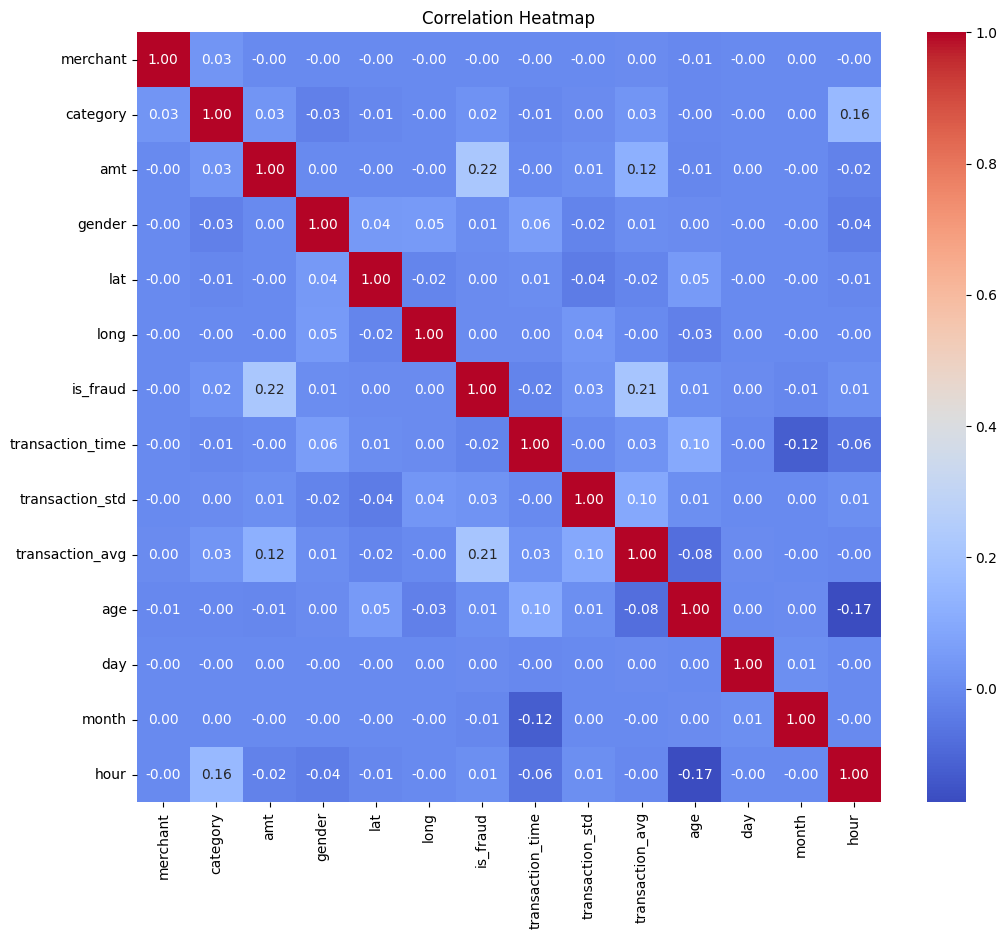

In [ ]:
# prompt: create heatmap correlation a

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_new.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


data testing

In [ ]:
cat_features = ['merchant', 'category','gender']
df_test_new, label_encoders = encode_and_store_label_encoders(df_test_transaction, cat_features)
df_test_new.head()

,merchant,category,amt,gender,lat,long,is_fraud,transaction_time,transaction_std,transaction_avg,age,day,month,hour
157,362,6,124.6875,0,43.0,-108.875,0,NaN,180.02718,66.499519,53,21,6,13
741,225,9,78.5000,0,43.0,-108.875,0,3.331667,180.02718,66.499519,31,21,6,16
3047,103,2,65.2500,0,43.0,-108.875,0,15.549167,180.02718,66.499519,59,22,6,7
4351,373,7,87.7500,0,43.0,-108.875,0,7.566111,180.02718,66.499519,80,22,6,15
7695,382,10,148.0000,0,43.0,-108.875,0,20.939722,180.02718,66.499519,64,23,6,12


In [ ]:
# prompt: find proportion of fraud in df_test

fraud_proportion_train = df_train_new['is_fraud'].mean()*100
print(f"Proportion of fraud in df_train: {fraud_proportion_train:.4f}")

fraud_proportion_test = df_test_new['is_fraud'].mean()*100
print(f"Proportion of fraud in df_test: {fraud_proportion_test:.4f}")

Proportion of fraud in df_train: 0.5789
Proportion of fraud in df_test: 0.3860


## handle imbalance data

A. undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt

$sampling\_strategy = \frac{proporsi\_minoritas}{1 - proporsi\_minoritas}$



Hasil setelah Random Undersampling:
is_fraud
0    37530
1     7506
Name: count, dtype: int64
Jumlah total data setelah sampling =  45036


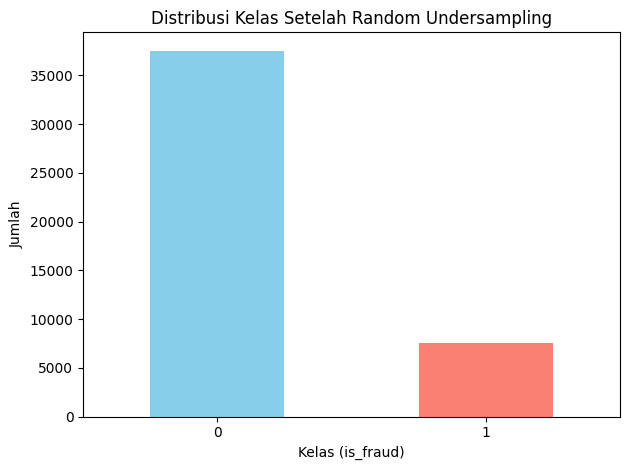

In [ ]:
# Pisahkan fitur dan target
X = df_train_new.drop('is_fraud', axis=1)
y = df_train_new['is_fraud']

# rasio: minoritas 1%, mayoritas 99% 0.01
# rasio: minoritas 20%, mayoritas 80% 0.25
# rasio: minoritas 30%, mayoritas 70% 0.43
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

df_train_new_under = pd.concat([pd.DataFrame(X_rus, columns=X.columns), pd.DataFrame(y_rus, columns=['is_fraud'])], axis=1)

print('Hasil setelah Random Undersampling:')
print(df_train_new_under['is_fraud'].value_counts())
print("Jumlah total data setelah sampling = ", df_train_new_under.shape[0])

df_train_new_under['is_fraud'].value_counts().plot(
    kind='bar',
    title='Distribusi Kelas Setelah Random Undersampling',
    xlabel='Kelas (is_fraud)',
    ylabel='Jumlah',
    color=['skyblue', 'salmon']
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Hasil setelah Random Oversampling:
is_fraud
0    553574
1      2145
Name: count, dtype: int64
Jumlah total data setelah sampling =  555719


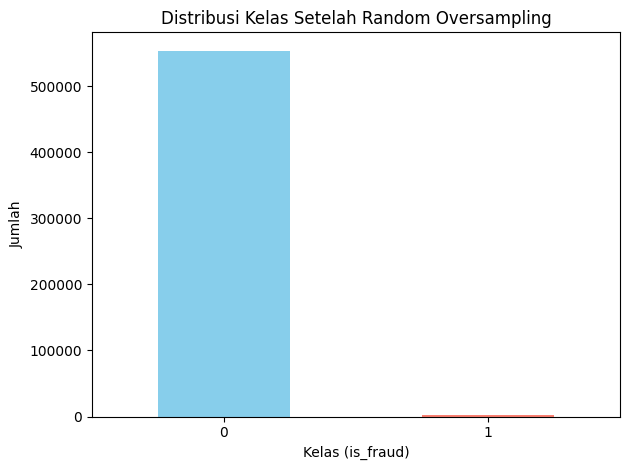

In [ ]:
# prompt: oversampling the new df_train_test_under data

import pandas as pd
import matplotlib.pyplot as plt
#!pip install -U imbalanced-learn

from imblearn.over_sampling import RandomOverSampler

# Pisahkan fitur dan target dari df_train_new_under
X_under = df_train_new_under.drop('is_fraud', axis=1)
y_under = df_train_new_under['is_fraud']

# Tentukan sampling_strategy untuk oversampling.
# Misalnya, jika Anda ingin minoritas menjadi 50% dari total data:
# target_ratio = 0.50
# count_minority = y_under.value_counts()[1]
# count_majority = y_under.value_counts()[0]
# desired_minority_count = int(count_majority * target_ratio / (1 - target_ratio))
# sampling_strategy_oversample = {0: count_majority, 1: desired_minority_count}

# Atau, jika Anda ingin minoritas menjadi 100% dari mayoritas (rasio 1:1 setelah oversampling):

print('\nHasil setelah Random Oversampling:')
print(df_test_new['is_fraud'].value_counts())
print("Jumlah total data setelah sampling = ", df_test_new.shape[0])

df_test_new['is_fraud'].value_counts().plot(
    kind='bar',
    title='Distribusi Kelas Setelah Random Oversampling',
    xlabel='Kelas (is_fraud)',
    ylabel='Jumlah',
    color=['skyblue', 'salmon']
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
resumetable(df_train_test_under)

Dataset Shape: (825660, 14)


,dtypes,missing,missing(%),unique,first_value,second_value,third_value
merchant,int64,0,0.000000,693,341.000000,445.000000,76.000000
category,int64,0,0.000000,14,12.000000,5.000000,7.000000
amt,float16,0,0.000000,8686,2.169922,36.031250,11.953125
gender,int64,0,0.000000,2,0.000000,0.000000,1.000000
lat,float16,0,0.000000,489,43.750000,34.281250,42.843750
long,float16,0,0.000000,511,-97.562500,-91.312500,-75.687500
transaction_time,float64,1302,0.157692,131451,3.103056,1.163611,11.846667
transaction_std,float64,0,0.000000,983,144.543159,132.768439,478.129457
transaction_avg,float32,0,0.000000,983,61.805515,91.440941,80.424973
age,int64,0,0.000000,81,53.000000,32.000000,62.000000


# Modelling

## Baseline Model

In [ ]:
import os,gc
#sort data based on time dan pisahkan fitur vs target
X_train = df_train_new_under.drop(['is_fraud'], axis=1)
y_train = df_train_new_under['is_fraud']
X_test = df_test_new.drop(['is_fraud'], axis=1)
y_test = df_test_new['is_fraud']

print(X_train.shape)
print(X_test.shape)

(45036, 13)
(555719, 13)


In [ ]:

resumetable(X_train)

Dataset Shape: (824358, 13)


,dtypes,missing,missing(%),unique,first_value,second_value,third_value
merchant,int64,0,0.0,693,341.000000,445.000000,76.000000
category,int64,0,0.0,14,12.000000,5.000000,7.000000
amt,float16,0,0.0,8685,2.169922,36.031250,11.953125
gender,int64,0,0.0,2,0.000000,0.000000,1.000000
lat,float16,0,0.0,489,43.750000,34.281250,42.843750
long,float16,0,0.0,511,-97.562500,-91.312500,-75.687500
transaction_time,float64,0,0.0,131451,3.103056,1.163611,11.846667
transaction_std,float64,0,0.0,983,144.543159,132.768439,478.129457
transaction_avg,float32,0,0.0,983,61.805515,91.440941,80.424973
age,int64,0,0.0,81,53.000000,32.000000,62.000000


In [ ]:
# prompt: normalize all data

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
# Exclude the 'is_fraud' column before fitting and transforming
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames, keeping the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nNormalized Training Data Head:")
print(X_train_scaled.head())

print("\nNormalized Testing Data Head:")
print(X_test_scaled.head())



Normalized Training Data Head:
   merchant  category       amt  gender       lat      long  transaction_time  \
0  0.492775  0.923077  0.000097     0.0  0.508372  0.696737          0.012913   
1  0.643064  0.384615  0.002914     0.0  0.305425  0.760717          0.004842   
2  0.109827  0.538462  0.000911     1.0  0.488948  0.920665          0.049300   
3  0.514451  0.076923  0.000547     1.0  0.491628  0.793986          0.086298   
4  0.151734  0.846154  0.000794     0.0  0.340924  0.834293          0.015492   

   transaction_std  transaction_avg       age       day     month      hour  
0         0.073768         0.020815  0.407407  0.666667  0.272727  0.695652  
1         0.063464         0.053531  0.148148  0.233333  0.545455  0.608696  
2         0.365682         0.041370  0.518519  0.066667  0.363636  0.565217  
3         0.035391         0.004399  0.012346  0.800000  0.818182  0.521739  
4         0.061385         0.048659  0.135802  0.033333  0.000000  0.739130  

Normalized T

In [ ]:
resumetable(X_train)

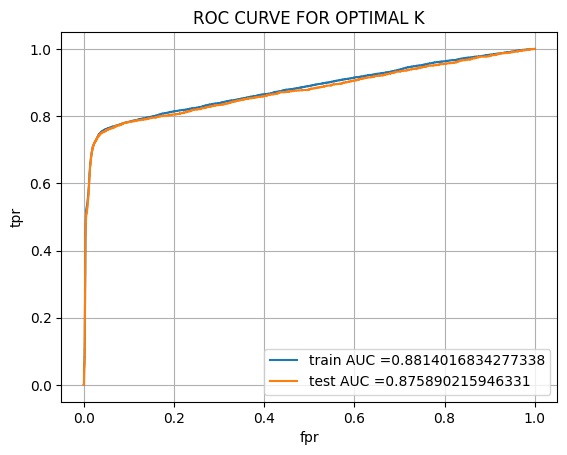

Area under train roc 0.8814016834277338
Area under test roc 0.875890215946331


In [ ]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

model1 = LogisticRegression(solver='liblinear',class_weight='balanced')
model1 = model1.fit(X_train_scaled,y_train)
y_pred = model1.predict(X_test_scaled)

train_fpr, train_tpr, thresholds = roc_curve(y_train, model1.predict_proba(X_train_scaled)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test_scaled)[:,1])
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[538077,  14593],
       [   582,   1543]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced')
no_of_estimators = [5, 10, 50, 100, 120]
maximumdepth = [1, 5, 7, 10, 15, 25, 30]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
model2 = RandomizedSearchCV(estimator=clf,  param_distributions=parameters, cv=3, n_iter=6, scoring='roc_auc')
model2.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_iter=6,
                   param_distributions={'max_depth': [1, 5, 7, 10, 15, 25, 30],
                                        'n_estimators': [5, 10, 50, 100, 120]},
                   scoring='roc_auc')

In [ ]:
model2.best_params_

{'n_estimators': 120, 'max_depth': 15}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=15,n_estimators=120)
model2.fit(X_train_scaled,y_train)
y_train_pred = model2.predict(X_train_scaled)
y_test_pred = model2.predict(X_test_scaled)

train_fpr, train_tpr, thresholds = roc_curve(y_train, model2.predict_proba(X_train_scaled)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test_scaled)[:,1])

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


Area under train roc 0.9999308016989196
Area under test roc 0.9912916253609483


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC
#train_auc = roc_auc_score(y_train, model2.predict_proba(X_train_scaled)[:,1])
#test_auc = roc_auc_score(y_test, model2.predict_proba(X_test_scaled)[:,1])

#plt.figure(figsize=(8,6))
#plt.plot(train_fpr, train_tpr, label=f"Train AUC = {train_auc:.4f}", color='blue')
#plt.plot(test_fpr, test_tpr, label=f"Test AUC = {test_auc:.4f}", color='green')
#plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curve - Random Forest")
#plt.grid(True)
#plt.legend()
#plt.show()

<Figure size 600x600 with 0 Axes>

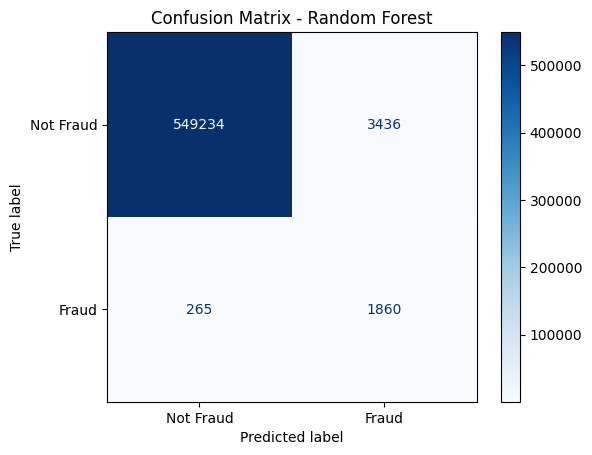

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Default threshold = 0.5
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Not Fraud", "Fraud"]))

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00    552670
       Fraud       0.35      0.88      0.50      2125

    accuracy                           0.99    554795
   macro avg       0.68      0.93      0.75    554795
weighted avg       1.00      0.99      0.99    554795



Precision fraud = 0.38 → Artinya, 62% deteksi fraud adalah false positive.

Dalam fraud detection: ini bisa berarti banyak transaksi normal "salah ditandai" fraud

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
params = {'n_estimators':[1000,2000],'max_depth':[3,6,12],'subsample':[0.4,0.8]}

clf = xgb.XGBClassifier(scale_pos_weight=99,
        missing=-1, learning_rate=0.02,
        eval_metric='auc', tree_method='hist', colsample_bytree=0.4) # Changed tree_method to 'hist'

model = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='roc_auc', verbose=1, cv=3, n_iter=6)
model.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=-1,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=6,
                   param_distributions={'max_depth': [3, 6, 12],
                                        'n_estimators': [1000, 2000],
                                        'subsample': [0.4, 0.8]},
                   scoring='roc_auc', verbose=1)

In [ ]:
model.best_params_

{'subsample': 0.8, 'n_estimators': 2000, 'max_depth': 6}

In [ ]:
model = xgb.XGBClassifier(
        missing=-1, learning_rate=0.02,
        eval_metric='auc', tree_method='hist',colsample_bytree=0.4,max_depth=6,n_estimators=2000,
        subsample=0.8, scale_pos_weight=99)
model.fit(X_train_scaled,y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train_scaled)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

Area under train roc 0.9999990347260428
Area under test roc 0.9970251776669197


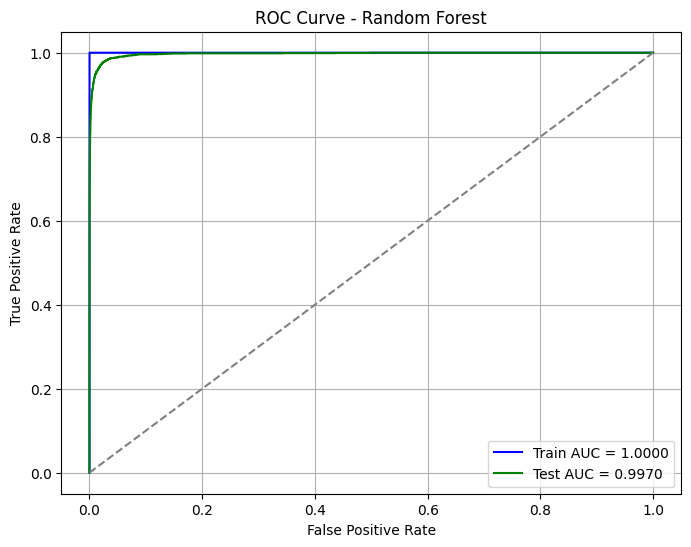

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC
train_auc = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:,1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label=f"Train AUC = {train_auc:.4f}", color='blue')
plt.plot(test_fpr, test_tpr, label=f"Test AUC = {test_auc:.4f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.4  # Adjust based on precision-recall trade-off
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

<Figure size 600x600 with 0 Axes>

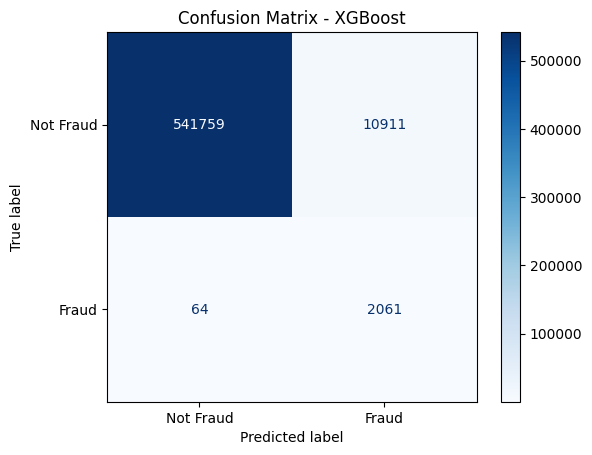

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Default threshold = 0.5
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - XGBoost')
plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Not Fraud", "Fraud"]))

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99    552670
       Fraud       0.18      0.96      0.31      2125

    accuracy                           0.98    554795
   macro avg       0.59      0.97      0.65    554795
weighted avg       1.00      0.98      0.99    554795



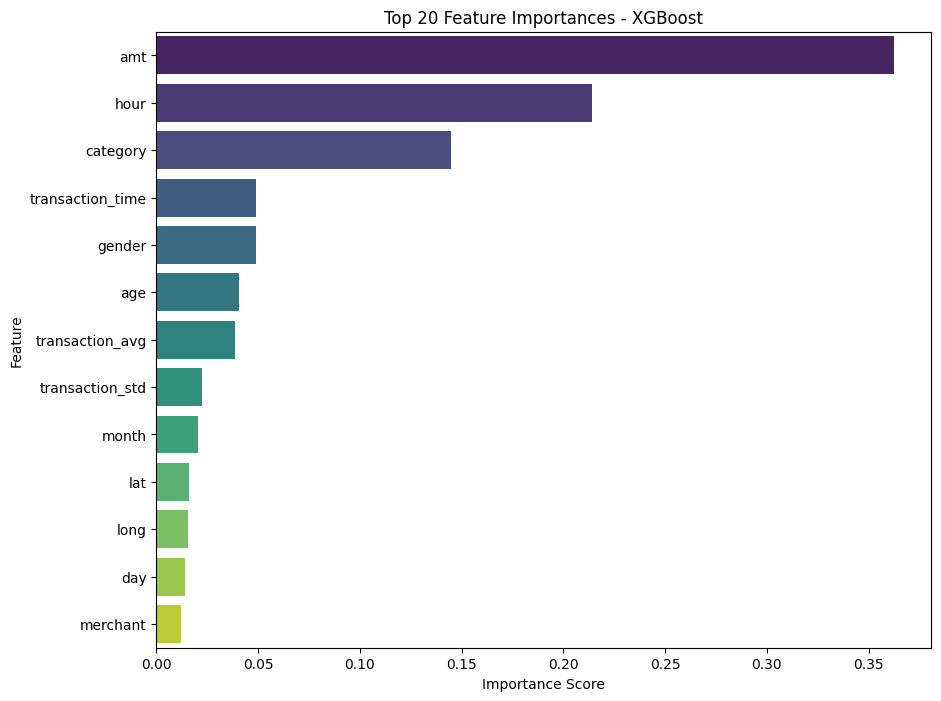

In [ ]:
# prompt: create improtance score

import pandas as pd
import matplotlib.pyplot as plt
# Importance score
importance_scores = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_scores
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Contamination rate for Isolation Forest: 0.1667

Isolation Forest Evaluation:


<Figure size 600x600 with 0 Axes>

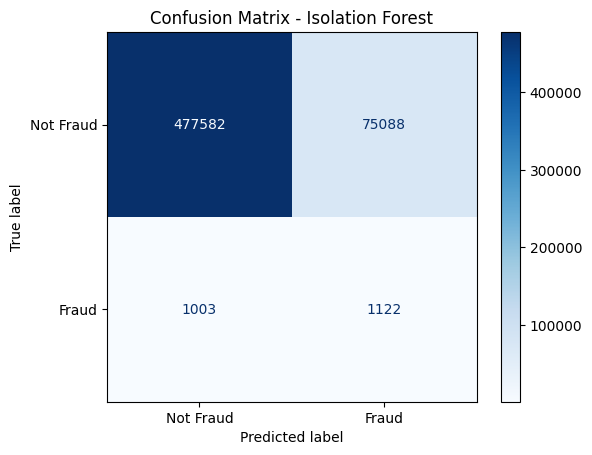

Classification Report - Isolation Forest:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.86      0.93    552670
       Fraud       0.01      0.53      0.03      2125

    accuracy                           0.86    554795
   macro avg       0.51      0.70      0.48    554795
weighted avg       0.99      0.86      0.92    554795



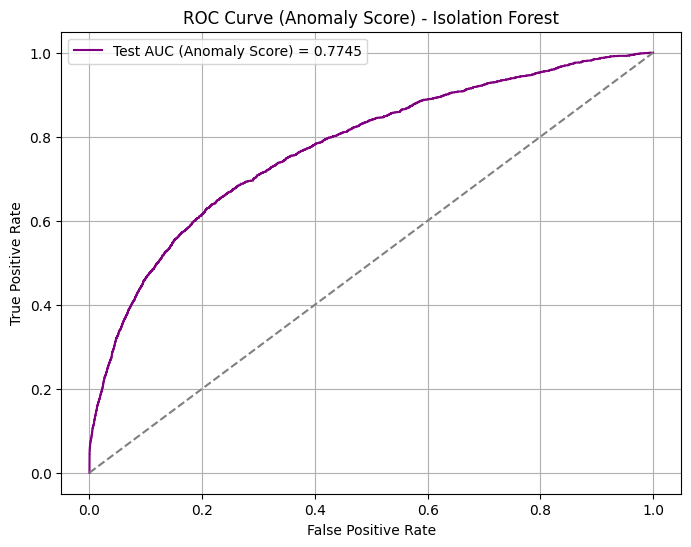

Area under Test ROC (using Anomaly Scores): 0.7745


In [ ]:
# prompt: build isolation forest using scaled dataset

import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Build Isolation Forest model on the scaled training data
# Isolation Forest is typically used for anomaly detection, where 1 is an anomaly (fraud)
# It does not directly use the 'is_fraud' label during training, but we can train it on the majority class (non-fraud)
# or on the entire dataset and interpret anomalies as fraud.
# Let's train it on the entire scaled training dataset (assuming fraud is the minority anomaly)

# Select features for Isolation Forest - typically numerical features are used
# We will use the scaled features from X_train_scaled
X_train_iso = X_train_scaled.copy()

# Initialize Isolation Forest
# contamination: the proportion of outliers in the data set. This parameter is crucial.
# Since the training data is undersampled, the contamination rate in X_train_scaled
# is higher than in the original dataset. A reasonable starting point might be
# the proportion of fraud in the undersampled dataset.
# However, Isolation Forest works best when training on the clean data and identifying anomalies
# in new data. Let's train on the undersampled data and set contamination based on the
# fraud proportion in that undersampled set.
contamination_rate = df_train_new_under['is_fraud'].mean()
print(f"Contamination rate for Isolation Forest: {contamination_rate:.4f}")


iso_forest = IsolationForest(n_estimators=100, # Number of base estimators
                             contamination=contamination_rate, # Proportion of outliers in the data
                             random_state=42,
                             n_jobs=-1)

# Fit the model
iso_forest.fit(X_train_iso)

# Predict on the scaled test data
# predict returns -1 for outliers (fraud) and 1 for inliers (non-fraud)
y_pred_iso = iso_forest.predict(X_test_scaled)

# Convert predictions to 0 (non-fraud) and 1 (fraud) to match y_test
y_pred_iso_binary = [1 if pred == -1 else 0 for pred in y_pred_iso]

# Evaluate the model
print("\nIsolation Forest Evaluation:")

# Confusion Matrix
cm_iso = confusion_matrix(y_test, y_pred_iso_binary)
disp_iso = ConfusionMatrixDisplay(confusion_matrix=cm_iso, display_labels=["Not Fraud", "Fraud"])

plt.figure(figsize=(6,6))
disp_iso.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Isolation Forest')
plt.grid(False)
plt.show()

# Classification Report
print("Classification Report - Isolation Forest:")
print(classification_report(y_test, y_pred_iso_binary, target_names=["Not Fraud", "Fraud"]))

# Note: Isolation Forest does not directly provide probabilities, so ROC AUC plot and score
# calculation using predict_proba is not applicable.
# The decision_function can be used for anomaly scores, which can then be used for ROC curves,
# but the interpretation is slightly different (lower score is more anomalous).

# Get anomaly scores
anomaly_scores = iso_forest.decision_function(X_test_scaled)

# For ROC AUC, we need scores where higher means more likely fraud. Anomaly scores are lower for anomalies.
# So, we can use -anomaly_scores.
test_fpr_iso, test_tpr_iso, thresholds_iso = roc_curve(y_test, -anomaly_scores)
test_auc_iso = auc(test_fpr_iso, test_tpr_iso)

plt.figure(figsize=(8,6))
plt.plot(test_fpr_iso, test_tpr_iso, label=f"Test AUC (Anomaly Score) = {test_auc_iso:.4f}", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Anomaly Score) - Isolation Forest")
plt.grid(True)
plt.legend()
plt.show()

print(f"Area under Test ROC (using Anomaly Scores): {test_auc_iso:.4f}")



Number of transactions flagged by Isolation Forest: 76210

Evaluating XGBoost on transactions flagged by Isolation Forest:


<Figure size 600x600 with 0 Axes>

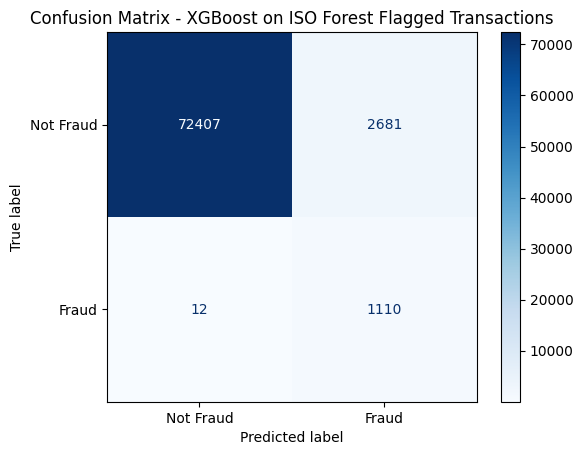

Classification Report - XGBoost on ISO Forest Flagged Transactions:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     75088
       Fraud       0.29      0.99      0.45      1122

    accuracy                           0.96     76210
   macro avg       0.65      0.98      0.72     76210
weighted avg       0.99      0.96      0.97     76210


Evaluating the Two-Stage (Isolation Forest + XGBoost) Model on the Entire Test Set:


<Figure size 600x600 with 0 Axes>

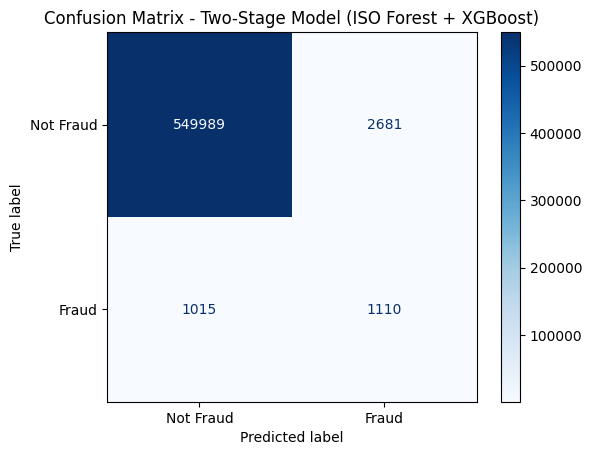

Classification Report - Two-Stage Model (ISO Forest + XGBoost):
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    552670
       Fraud       0.29      0.52      0.38      2125

    accuracy                           0.99    554795
   macro avg       0.65      0.76      0.69    554795
weighted avg       1.00      0.99      0.99    554795



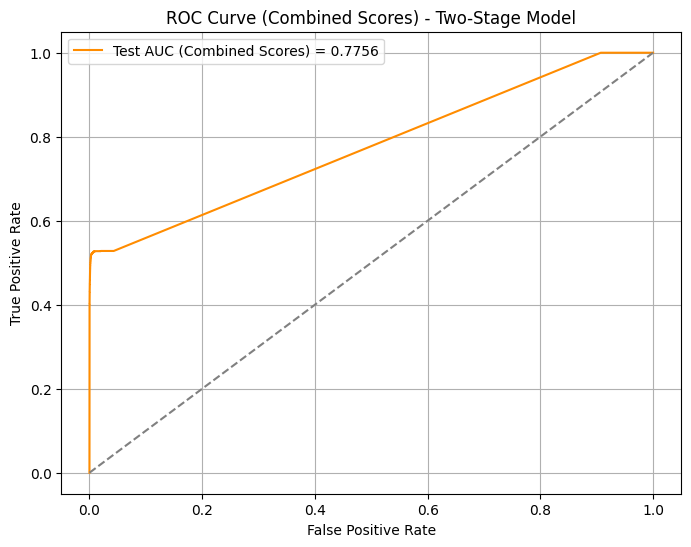

Area under Test ROC (using Combined Scores): 0.7756


In [ ]:
# prompt: Combine XGBoost with anomaly detection models (e.g., Isolation Forest) for a two-stage approach:
# Use Isolation Forest to flag potential outliers (frauds).
# Pass flagged transactions to XGBoost for final classification.

import matplotlib.pyplot as plt
import numpy as np
# Apply Isolation Forest to flag potential outliers/frauds in the test set
# We already have the predictions y_pred_iso_binary from the previous step
# y_pred_iso_binary contains 1 for flagged as potential fraud (outlier) and 0 for non-fraud (inlier)

# Create a subset of the test data containing only the transactions flagged as potential fraud by Isolation Forest
flagged_indices = [i for i, pred in enumerate(y_pred_iso_binary) if pred == 1]
X_test_flagged = X_test_scaled.iloc[flagged_indices]
y_test_flagged = y_test.iloc[flagged_indices]

print(f"\nNumber of transactions flagged by Isolation Forest: {len(X_test_flagged)}")

if len(X_test_flagged) > 0:
    # Pass the flagged transactions to the trained XGBoost model for final classification
    # Use the previously trained 'model' (our XGBoost classifier)
    # We will predict probabilities on the flagged subset
    y_pred_xgb_on_flagged_proba = model.predict_proba(X_test_flagged)[:, 1]

    # We can then make a final binary prediction using a threshold on these probabilities
    # Let's use the default threshold of 0.5 for demonstration, or you could tune this.
    final_predictions_on_flagged = (y_pred_xgb_on_flagged_proba > 0.5).astype(int)

    # Evaluate the performance of XGBoost specifically on the flagged subset
    print("\nEvaluating XGBoost on transactions flagged by Isolation Forest:")

    cm_xgb_flagged = confusion_matrix(y_test_flagged, final_predictions_on_flagged)
    disp_xgb_flagged = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_flagged, display_labels=["Not Fraud", "Fraud"])

    plt.figure(figsize=(6,6))
    disp_xgb_flagged.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix - XGBoost on ISO Forest Flagged Transactions')
    plt.grid(False)
    plt.show()

    print("Classification Report - XGBoost on ISO Forest Flagged Transactions:")
    print(classification_report(y_test_flagged, final_predictions_on_flagged, target_names=["Not Fraud", "Fraud"]))

    # Note: The combined model's overall performance on the entire test set
    # would involve combining the non-flagged transactions (classified as non-fraud)
    # with the final classifications from XGBoost on the flagged transactions.

    # To get a full picture of the two-stage model's performance on the entire test set:
    # Initialize an array for the final predictions on the entire test set
    final_y_pred_two_stage = np.zeros(len(X_test_scaled), dtype=int)

    # Transactions NOT flagged by Isolation Forest are classified as non-fraud (0)
    non_flagged_indices = [i for i, pred in enumerate(y_pred_iso_binary) if pred == 0]
    final_y_pred_two_stage[non_flagged_indices] = 0

    # Transactions flagged by Isolation Forest get the classification from XGBoost
    # Map back the predictions on flagged data to the original test set indices
    for original_idx, final_pred in zip(flagged_indices, final_predictions_on_flagged):
        final_y_pred_two_stage[original_idx] = final_pred

    print("\nEvaluating the Two-Stage (Isolation Forest + XGBoost) Model on the Entire Test Set:")

    # Overall Confusion Matrix
    cm_two_stage = confusion_matrix(y_test, final_y_pred_two_stage)
    disp_two_stage = ConfusionMatrixDisplay(confusion_matrix=cm_two_stage, display_labels=["Not Fraud", "Fraud"])

    plt.figure(figsize=(6,6))
    disp_two_stage.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix - Two-Stage Model (ISO Forest + XGBoost)')
    plt.grid(False)
    plt.show()

    # Overall Classification Report
    print("Classification Report - Two-Stage Model (ISO Forest + XGBoost):")
    print(classification_report(y_test, final_y_pred_two_stage, target_names=["Not Fraud", "Fraud"]))

    # Overall ROC AUC for the two-stage model is tricky because one stage doesn't produce probabilities.
    # You could use the anomaly scores from IF for non-flagged instances and XGBoost probabilities for flagged ones,
    # but the scales and interpretations are different. A simpler approach is to focus on metrics like
    # Precision, Recall, and F1-score from the confusion matrix, which are directly based on binary predictions.
    # If an ROC AUC is strictly needed, you would need a way to combine the scores from both stages into a single score per transaction.
    # One possible approach is to set a very low score (close to 0) for transactions not flagged by IF,
    # and use the XGBoost probability for flagged transactions.
    # Let's attempt a simplified ROC AUC calculation using predicted probabilities from XGBoost for flagged
    # transactions and assign a low "fraud probability" to non-flagged transactions.

    # Initialize an array for combined scores on the entire test set
    combined_scores_two_stage = np.zeros(len(X_test_scaled))

    # Assign a low score to transactions not flagged by IF (classified as non-fraud)
    # We use a small value (e.g., 0.001) to represent a very low probability of fraud
    combined_scores_two_stage[non_flagged_indices] = 0.001 # Example low score

    # Assign the XGBoost predicted probability to transactions flagged by IF
    for original_idx, xgb_proba in zip(flagged_indices, y_pred_xgb_on_flagged_proba):
        combined_scores_two_stage[original_idx] = xgb_proba

    # Calculate ROC AUC using the combined scores
    test_fpr_two_stage, test_tpr_two_stage, thresholds_two_stage = roc_curve(y_test, combined_scores_two_stage)
    test_auc_two_stage = auc(test_fpr_two_stage, test_tpr_two_stage)

    plt.figure(figsize=(8,6))
    plt.plot(test_fpr_two_stage, test_tpr_two_stage, label=f"Test AUC (Combined Scores) = {test_auc_two_stage:.4f}", color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Combined Scores) - Two-Stage Model")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Area under Test ROC (using Combined Scores): {test_auc_two_stage:.4f}")


else:
    print("No transactions were flagged by Isolation Forest. No second stage classification performed.")

#sample use model

## Random Forest

In [ ]:
import pandas as pd

def predict_new_data(model, sample_dict, encoders, feature_order):
    # Buat dataframe dari input dictionary
    df_sample = pd.DataFrame([sample_dict])

    # Apply label encoding ke setiap kolom kategorikal
    for col, encoder in encoders.items():
        if col in df_sample.columns:
            try:
                df_sample[col] = encoder.transform(df_sample[col])
            except ValueError:
                print(f"⚠️ Value '{df_sample[col].values[0]}' belum pernah ada saat training di kolom '{col}'")
                return None

    # Urutkan kolom agar sesuai dengan X_train
    df_sample = df_sample[feature_order]

    # Prediksi
    pred_class = model.predict(df_sample)[0]
    pred_proba = model.predict_proba(df_sample)[0][1]

    print(f"Predicted Class: {'FRAUD' if pred_class == 1 else 'NOT FRAUD'}")
    print(f"Probability of Fraud: {pred_proba:.4f}")
    return pred_class, pred_proba

Data asli (label fraud)

In [ ]:
feature_order = X_train.columns.tolist()

sample_input = {
    'trans_date_trans_time': '2019-01-02 01:06:37',
    'cc_num': 4613314721966,
    'merchant': 'fraud_Rutherford-Mertz',
    'category': 'grocery_pos',
    'amt': 281.0,
    'first': 'Jason',
    'last': 'Murphy',
    'gender': 'M',
    'street': '542 Steve Curve Suite 011',
    'city': 'Collettsville',
    'state': 'NC',
    'zip': 28611,
    'lat': 36.0000,
    'long': -81.7500,
    'city_pop': 885,
    'job': 'Soil scientist',
    'dob': '1988-09-15',
    'trans_num': 'e8a81877ae9a0a7f883e15cb39dc4022',
    'unix_time': 1325466397,
    'merch_lat': 36.4375,
    'merch_long': -81.1875,
    'merch_zipcode': 28644.0
}

predict_new_data(model, sample_input, encoders=label_encoders, feature_order=feature_order)

Data asli (label not fraud)

In [ ]:
feature_order = X_train.columns.tolist()

sample_input = {
    'trans_date_trans_time': '2019-01-01 00:00:18',
    'cc_num': 2703186189652095,
    'merchant': 'fraud_Rippin, Kub and Mann',
    'category': 'misc_net',
    'amt': 4.96875,
    'first': 'Jennifer',
    'last': 'Banks',
    'gender': 'F',
    'street': '561 Perry Cove',
    'city': 'Moravian Falls',
    'state': 'NC',
    'zip': 28654,
    'lat': 36.09375,
    'long': -81.1875,
    'city_pop': 3495,
    'job': 'Psychologist, counselling',
    'dob': '1988-03-09',
    'trans_num': '0b242abb623afc578575680df30655b9',
    'unix_time': 1325376018,
    'merch_lat': 36.00000,
    'merch_long': -82.0625,
    'merch_zipcode': 28705.0
}

predict_new_data(model2, sample_input, encoders=label_encoders, feature_order=feature_order)

In [ ]:
# prompt: create predict function for xgboost model

import pandas as pd
import numpy as np
def predict_with_xgboost(model, sample_dict, encoders, feature_order, scaler):
    """
    Makes a prediction using the trained XGBoost model.

    Args:
        model: Trained XGBoost model.
        sample_dict: Dictionary containing the features for a single transaction.
        encoders: Dictionary of fitted LabelEncoders for categorical features.
        feature_order: List of feature names in the correct order expected by the model.
        scaler: Fitted MinMaxScaler.

    Returns:
        A tuple containing:
            - Predicted class (0 for Not Fraud, 1 for Fraud)
            - Probability of Fraud (float)
            - None if encoding fails due to unseen categorical values.
    """
    # Create dataframe from input dictionary
    df_sample = pd.DataFrame([sample_dict])

    # Process date and time features (must match training preprocessing)
    df_sample['trans_date_trans_time'] = pd.to_datetime(df_sample['trans_date_trans_time'])
    df_sample['dob'] = pd.to_datetime(df_sample['dob'])

    # Add temporal features (must match training preprocessing)
    # Note: transaction_time, transaction_std, transaction_avg depend on previous transactions
    # for the same card number. For a single new sample, these are tricky.
    # For a single sample prediction, we might need to make assumptions or pass them in.
    # A simple approach for a single sample is to use default values or handle them carefully.
    # For this function, let's assume these features are provided or can be reasonably inferred.
    # A more robust solution for batch prediction would require the full history of the card.
    # For a single prediction, let's assume transaction_time is None, and transaction_std/avg
    # could be the global average from the training data if not provided.
    # However, the training data included them. Let's add dummy values for now and
    # note this limitation for single sample prediction.
    # A better approach for single real-time prediction would be to calculate/retrieve
    # the card's average amount and transaction time difference from a database.

    # Placeholder for transaction time features for a single sample - ideally these come from context
    # based on the specific cc_num's history.
    # For a single standalone prediction without history lookup:
    df_sample['transaction_time'] = np.nan # Or some imputation strategy like mean from training
    df_sample['transaction_std'] = X_train['transaction_std'].mean() # Use mean from training
    df_sample['transaction_avg'] = X_train['transaction_avg'].mean() # Use mean from training


    df_sample['age'] = 2025 - df_sample['dob'].dt.year
    df_sample['day'] = df_sample['trans_date_trans_time'].dt.day
    df_sample['month'] = df_sample['trans_date_trans_time'].dt.month
    df_sample['hour'] = df_sample['trans_date_trans_time'].dt.hour

    # Drop columns that were dropped during training preprocessing
    to_drop_pred = ['trans_date_trans_time','Unnamed: 0','first', 'last','merch_lat','merch_long','job', 'dob','street', 'city', 'state', 'zip', 'city_pop'
           ,'merch_zipcode', 'unix_time', 'trans_num','cc_num']
    df_sample = df_sample.drop(columns=[col for col in to_drop_pred if col in df_sample.columns])


    # Apply label encoding to each categorical column
    cat_features_pred = ['merchant', 'category','gender'] # Must match trained features
    for col in cat_features_pred:
        if col in df_sample.columns:
            # Handle unseen categories during prediction
            # Option 1: Treat unseen as a special category (if encoder was fitted this way)
            # Option 2: Return None or raise error (what we do here for simplicity)
            # Option 3: Use handle_unknown='ignore' in OneHotEncoder (if using OHE instead of LabelEncoder)
            if df_sample[col].values[0] not in encoders[col].classes_:
                 print(f"⚠️ Value '{df_sample[col].values[0]}' in column '{col}' was not seen during training.")
                 # Option to use a default value or the most frequent value if needed
                 # df_sample[col] = encoders[col].transform([encoders[col].classes_[0]]) # Example: transform to the first class
                 return None, None, f"Unseen categorical value in '{col}'"
            df_sample[col] = encoders[col].transform(df_sample[col])
        # else:
        #     # Handle missing categorical columns in the input
        #     print(f"⚠️ Column '{col}' is missing in the input data.")
        #     return None, None, f"Missing required column '{col}'"


    # Ensure all features from training data are present and in the correct order
    # Fill missing columns with a placeholder (e.g., 0 or mean) - this should ideally not happen
    # if the input dictionary contains all necessary features after initial processing.
    # We will reindex to ensure order and add any missing columns from X_train.columns
    # If a column is missing after initial processing, it likely wasn't in the input dict
    # and wasn't a derived feature. This indicates an issue with the input data format.
    # Let's just reindex and assume missing columns will be filled with NaN by default,
    # which might cause issues if the model doesn't handle NaNs.
    # A safer approach is to explicitly check for missing essential columns.

    # Ensure all columns from feature_order are present, fill missing with np.nan first
    for col in feature_order:
        if col not in df_sample.columns:
            df_sample[col] = np.nan # Fill missing columns with NaN

    # Reindex to ensure correct order
    df_sample = df_sample[feature_order]

    # Handle any NaNs that might have been introduced or exist in the input.
    # The trained XGBoost model uses missing=-1. We need to fill NaNs with -1.
    df_sample = df_sample.fillna(-1)


    # Scale the features using the fitted scaler
    # Need to keep column names after scaling if using a non-numpy input for the model
    df_sample_scaled_array = scaler.transform(df_sample)
    df_sample_scaled = pd.DataFrame(df_sample_scaled_array, columns=feature_order)


    # Predict probabilities
    pred_proba = model.predict_proba(df_sample_scaled)[:, 1] # Get probability of the positive class (Fraud)

    # Predict class
    pred_class = (pred_proba > 0.5).astype(int)[0] # Use 0.5 threshold for binary class prediction

    print(f"Predicted Class: {'FRAUD' if pred_class == 1 else 'NOT FRAUD'}")
    print(f"Probability of Fraud: {pred_proba[0]:.4f}")
    return pred_class, pred_proba[0], None


# Example usage with the trained XGBoost model ('model') and scaler
# Use the feature_order list derived from the training data X_train.columns

# Example 1: Using a sample input dictionary for a known fraud transaction
sample_input_fraud = {
    'trans_date_trans_time': '2019-01-02 01:06:37',
    'cc_num': 4613314721966,
    'merchant': 'fraud_Rutherford-Mertz',
    'category': 'grocery_pos',
    'amt': 281.0,
    'first': 'Jason', # This will be dropped
    'last': 'Murphy', # This will be dropped
    'gender': 'M',
    'street': '542 Steve Curve Suite 011', # This will be dropped
    'city': 'Collettsville', # This will be dropped
    'state': 'NC', # This will be dropped
    'zip': 28611, # This will be dropped
    'lat': 36.0000,
    'long': -81.7500,
    'city_pop': 885, # This will be dropped
    'job': 'Soil scientist', # This will be dropped
    'dob': '1988-09-15',
    'trans_num': 'e8a81877ae9a0a7f883e15cb39dc4022', # This will be dropped
    'unix_time': 1325466397, # This will be dropped
    'merch_lat': 36.4375, # This will be dropped
    'merch_long': -81.1875, # This will be dropped
    'merch_zipcode': 28644.0 # This will be dropped
    # Note: transaction_time, transaction_std, transaction_avg will be calculated/imputed inside the function
}

print("\nPredicting for a sample likely FRAUD transaction:")
predicted_class, predicted_proba, error = predict_with_xgboost(model, sample_input_fraud, label_encoders, feature_order, scaler)
if error:
    print(f"Prediction failed: {error}")

# Example 2: Using a sample input dictionary for a known non-fraud transaction
sample_input_not_fraud = {
    'trans_date_trans_time': '2019-01-01 00:00:18',
    'cc_num': 2703186189652095,
    'merchant': 'fraud_Rippin, Kub and Mann',
    'category': 'misc_net',
    'amt': 4.96875,
    'first': 'Jennifer', # This will be dropped
    'last': 'Banks', # This will be dropped
    'gender': 'F',
    'street': '561 Perry Cove', # This will be dropped
    'city': 'Moravian Falls', # This will be dropped
    'state': 'NC', # This will be dropped
    'zip': 28654, # This will be dropped
    'lat': 36.09375,
    'long': -81.1875,
    'city_pop': 3495, # This will be dropped
    'job': 'Psychologist, counselling', # This will be dropped
    'dob': '1988-03-09',
    'trans_num': '0b242abb623afc578575680df30655b9', # This will be dropped
    'unix_time': 1325376018, # This will be dropped
    'merch_lat': 36.00000, # This will be dropped
    'merch_long': -82.0625, # This will be dropped
    'merch_zipcode': 28705.0 # This will be dropped
     # Note: transaction_time, transaction_std, transaction_avg will be calculated/imputed inside the function
}

print("\nPredicting for a sample likely NOT FRAUD transaction:")
predicted_class, predicted_proba, error = predict_with_xgboost(model, sample_input_not_fraud, label_encoders, feature_order, scaler)
if error:
    print(f"Prediction failed: {error}")

# Example 3: Test with an unseen categorical value (e.g., a new merchant)
sample_input_unseen_merchant = {
    'trans_date_trans_time': '2023-10-27 10:30:00',
    'cc_num': 9999999999999999,
    'merchant': 'fraud_NewUnseenMerchant', # This merchant is likely not in the training data
    'category': 'shopping_pos',
    'amt': 150.0,
    'first': 'Test',
    'last': 'User',
    'gender': 'F',
    'street': '123 Test St',
    'city': 'Testville',
    'state': 'CA',
    'zip': 90210,
    'lat': 34.0,
    'long': -118.0,
    'city_pop': 10000,
    'job': 'Engineer',
    'dob': '1990-05-20',
    'trans_num': 'test_unseen_trans_001',
    'unix_time': 1698391800,
    'merch_lat': 34.1,
    'merch_long': -118.1,
    'merch_zipcode': 90211.0
}

print("\nPredicting for a sample with an unseen merchant:")
predicted_class, predicted_proba, error = predict_with_xgboost(model, sample_input_unseen_merchant, label_encoders, feature_order, scaler)
if error:
    print(f"Prediction failed: {error}")
else:
     print("Prediction successful despite unseen merchant (if error handling was different).")


Predicting for a sample likely FRAUD transaction:
Predicted Class: FRAUD
Probability of Fraud: 1.0000

Predicting for a sample likely NOT FRAUD transaction:
Predicted Class: NOT FRAUD
Probability of Fraud: 0.0063

Predicting for a sample with an unseen merchant:
⚠️ Value 'fraud_NewUnseenMerchant' in column 'merchant' was not seen during training.
Prediction failed: Unseen categorical value in 'merchant'


## XGBoost

In [ ]:
import pandas as pd

def predict_new_data(model, sample_dict, encoders, feature_order):
    # Buat dataframe dari input dictionary
    df_sample = pd.DataFrame([sample_dict])

    # Apply label encoding ke setiap kolom kategorikal
    for col, encoder in encoders.items():
        if col in df_sample.columns:
            try:
                df_sample[col] = encoder.transform(df_sample[col])
            except ValueError:
                print(f"⚠️ Value '{df_sample[col].values[0]}' belum pernah ada saat training di kolom '{col}'")
                return None

    # Urutkan kolom agar sesuai dengan X_train
    df_sample = df_sample[feature_order]

    # Prediksi
    pred_class = model.predict(df_sample)[0]
    pred_proba = model.predict_proba(df_sample)[0][1]

    print(f"Predicted Class: {'FRAUD' if pred_class == 1 else 'NOT FRAUD'}")
    print(f"Probability of Fraud: {pred_proba:.4f}")
    return pred_class, pred_proba

Data asli (label fraud)

In [ ]:
feature_order = X_train.columns.tolist()

sample_input = {
    'trans_date_trans_time': '2019-01-02 01:06:37',
    'cc_num': 4613314721966,
    'merchant': 'fraud_Rutherford-Mertz',
    'category': 'grocery_pos',
    'amt': 281.0,
    'first': 'Jason',
    'last': 'Murphy',
    'gender': 'M',
    'street': '542 Steve Curve Suite 011',
    'city': 'Collettsville',
    'state': 'NC',
    'zip': 28611,
    'lat': 36.0000,
    'long': -81.7500,
    'city_pop': 885,
    'job': 'Soil scientist',
    'dob': '1988-09-15',
    'trans_num': 'e8a81877ae9a0a7f883e15cb39dc4022',
    'unix_time': 1325466397,
    'merch_lat': 36.4375,
    'merch_long': -81.1875,
    'merch_zipcode': 28644.0
}


NameError: name 'predict_new_data' is not defined

Data asli (label not fraud)

In [ ]:
feature_order = X_train.columns.tolist()

sample_input = {
    'trans_date_trans_time': '2019-01-01 00:00:18',
    'cc_num': 2703186189652095,
    'merchant': 'fraud_Rippin, Kub and Mann',
    'category': 'misc_net',
    'amt': 4.96875,
    'first': 'Jennifer',
    'last': 'Banks',
    'gender': 'F',
    'street': '561 Perry Cove',
    'city': 'Moravian Falls',
    'state': 'NC',
    'zip': 28654,
    'lat': 36.09375,
    'long': -81.1875,
    'city_pop': 3495,
    'job': 'Psychologist, counselling',
    'dob': '1988-03-09',
    'trans_num': '0b242abb623afc578575680df30655b9',
    'unix_time': 1325376018,
    'merch_lat': 36.00000,
    'merch_long': -82.0625,
    'merch_zipcode': 28705.0
}

predict_new_data(model, sample_input, encoders=label_encoders, feature_order=feature_order)

# save model

## XGBoost

In [ ]:
model.save_model('fraud_model_xgb.json')